# Local LLM Classifier Test

Test the LocalLLMClassifier on quark/gluon jet data using local OpenAI-compatible API.

This notebook demonstrates:
- Zero-shot jet classification with local reasoning models (e.g., GPT-OSS-120B)
- Reasoning effort control (low, medium, high)
- Async vs sequential processing comparison
- Token usage tracking

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time
import numpy as np
from pathlib import Path

# Add src to path
# sys.path.insert(0, str(Path.cwd().parent / 'src'))

from vibe_jet_tagging.local_llm_classifier import LocalLLMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

## Check Local Server

Make sure your local LLM server is running.

Example with vLLM:
```bash
vllm serve openai/gpt-oss-120b --port 8000
```

In [2]:
import requests

# Check if server is running
try:
    response = requests.get("http://localhost:8000/v1/models")
    if response.status_code == 200:
        models = response.json()
        print("‚úÖ Local LLM server is running")
        print(f"Available models: {[m['id'] for m in models['data']]}")
    else:
        print("‚ö†Ô∏è  Server responded but with error")
except Exception as e:
    print("‚ùå Local LLM server not reachable")
    print(f"Error: {e}")
    print("\nStart the server with: vllm serve openai/gpt-oss-120b --port 8000")

‚úÖ Local LLM server is running
Available models: ['openai/gpt-oss-120b']


## Load Data

Load the quark/gluon jet dataset.


In [4]:
# Load data
data_path = Path.cwd().parent / 'data' / 'qg_jets.npz'
data = np.load(data_path)

X = data['X']
y = data['y']

print(f"Loaded {len(X)} jets")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Quark jets: {(y == 1).sum()}")
print(f"Gluon jets: {(y == 0).sum()}")


Loaded 100000 jets
X shape: (100000, 139, 4)
y shape: (100000,)
Quark jets: 50000
Gluon jets: 50000


## Initialize LocalLLMClassifier

Set up the classifier with local OpenAI-compatible API.

**Configuration:**
- `model_name`: The model identifier (must match server)
- `reasoning_effort`: Controls reasoning depth ("low", "medium", "high")
- `reasoning_summary`: Controls output detail ("auto", "concise", "detailed")
- `base_url`: URL of your local server
- `api_key`: "EMPTY" for local servers without auth

In [5]:
# Initialize classifier with local API
clf = LocalLLMClassifier(
    model_name="openai/gpt-oss-120b",
    template_name="simple_list",
    format_type="list",
    templates_dir=str(Path.cwd().parent / 'templates'),
    reasoning_effort="medium",   # Options: "low", "medium", "high"
    reasoning_summary="auto",    # Options: "auto", "concise", "detailed"
    base_url="http://localhost:8000/v1",
    api_key="EMPTY"
)

# Fit (no-op for zero-shot)
clf.fit([], [])

print("Classifier initialized")
print(f"Model: {clf.model_name}")
print(f"Template: {clf.template_name}")
print(f"Format: {clf.format_type}")
print(f"Reasoning effort: {clf.reasoning_effort}")

Classifier initialized
Model: openai/gpt-oss-120b
Template: simple_list
Format: list
Reasoning effort: medium


## Test Single Jet Prediction


In [6]:
# Test on a single jet
test_jet = X[0]
true_label = y[0]

print(f"True label: {true_label} ({'quark' if true_label == 1 else 'gluon'})")
print(f"\nJet shape: {test_jet.shape}")
print(f"Number of particles (pt > 0): {(test_jet[:, 0] > 0).sum()}")

# Make prediction (sequential mode for single jet)
prediction = clf.predict([test_jet], verbose=True, use_async=False)[0]
print(f"\nPredicted label: {prediction} ({'quark' if prediction == 1 else 'gluon'})")
print(f"Correct: {prediction == true_label}")

True label: 1.0 (quark)

Jet shape: (139, 4)
Number of particles (pt > 0): 18

üîß API PARAMETERS
Model: openai/gpt-oss-120b
Reasoning effort: medium
Reasoning summary: auto


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üìä TOKEN USAGE
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Input tokens:        695
Output tokens:       580
  ‚îú‚îÄ Reasoning (est): 289
  ‚îî‚îÄ Completion:      291
Total tokens:        1,275

üí∞ COST
Input cost:          $0.000052
Output cost:         $0.000174
Call cost:           $0.000226

üß† REASONING TRACE
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ


In [7]:
clf.preview_prompt(test_jet)

PROMPT PREVIEW
Model: openai/gpt-oss-120b
Template: simple_list
Format: list
Reasoning effort: medium
Reasoning summary: auto

--------------------------------------------------------------------------------
PROMPT:
--------------------------------------------------------------------------------
You are a particle physics expert. Your task is to classify whether a jet is initiated by a quark (label: 1) or a gluon (label: 0).

A jet consists of particles, each with the following properties:
- pt: transverse momentum (GeV)
- y: rapidity
- phi: azimuthal angle (radians)
- pid: particle ID

Here is the jet data:
Particle 1: pt=0.269 GeV, y=0.357, phi=4.741, pid=22
Particle 2: pt=0.160 GeV, y=-0.256, phi=4.550, pid=22
Particle 3: pt=1.149 GeV, y=-0.062, phi=4.504, pid=-211
Particle 4: pt=4.132 GeV, y=0.174, phi=4.766, pid=-321
Particle 5: pt=1.696 GeV, y=-0.212, phi=4.797, pid=-211
Particle 6: pt=2.194 GeV, y=-0.052, phi=4.576, pid=22
Particle 7: pt=1.619 GeV, y=-0.068, phi=4.646, pid=22
Pa

## Reasoning Effort Control

Test how different reasoning effort levels affect performance and token usage.

For reasoning models:
- **low**: Fast reasoning with minimal depth
- **medium**: Balanced reasoning (default)
- **high**: Deep reasoning with maximum effort

In [8]:
# Test different reasoning efforts on a single jet
test_jet = X[0]

efforts = ["low", "medium", "high"]
results = []

for effort in efforts:
    print(f"\n{'='*60}")
    print(f"Testing with reasoning_effort={effort}")
    print(f"{'='*60}")
    
    clf_test = LocalLLMClassifier(
        model_name="openai/gpt-oss-120b",
        template_name="simple_list",
        format_type="list",
        templates_dir=str(Path.cwd().parent / 'templates'),
        reasoning_effort=effort,
        base_url="http://localhost:8000/v1",
        api_key="EMPTY"
    )
    clf_test.fit([], [])
    
    start = time.time()
    pred = clf_test.predict([test_jet], verbose=True, use_async=False)[0]
    elapsed = time.time() - start
    
    results.append({
        'effort': effort,
        'prediction': pred,
        'reasoning_tokens': clf_test.total_reasoning_tokens,
        'total_tokens': clf_test.total_prompt_tokens + clf_test.total_completion_tokens + clf_test.total_reasoning_tokens,
        'time': elapsed
    })

# Summary
print(f"\n{'='*70}")
print("SUMMARY")
print(f"{'='*70}")
print(f"{'Effort':<10} {'Reasoning':<12} {'Total':<12} {'Time':<10} {'Pred'}")
print("-" * 70)
for r in results:
    print(f"{r['effort']:<10} {r['reasoning_tokens']:<12,} {r['total_tokens']:<12,} {r['time']:<10.2f}s {r['prediction']}")


Testing with reasoning_effort=low

üîß API PARAMETERS
Model: openai/gpt-oss-120b
Reasoning effort: low
Reasoning summary: auto


‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
üìä TOKEN USAGE
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Input tokens:        695
Output tokens:       113
  ‚îú‚îÄ Reasoning (est): 56
  ‚îî‚îÄ Completion:      57
Total tokens:        808

üí∞ COST
Input cost:          $0.000052
Output cost:         $0.000034
Call cost:           $0.000086

üß† REASONING TRACE
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
We need guess: many photons, few hadrons, but high

## Async vs Sequential Comparison

Compare async (concurrent) vs sequential processing performance.

In [9]:
# Select test jets
n_test = 20
X_test = X[:n_test]
y_test = y[:n_test]

print(f"Testing on {n_test} jets...")
print(f"True distribution: {(y_test == 1).sum()} quark, {(y_test == 0).sum()} gluon")

Testing on 20 jets...
True distribution: 14 quark, 6 gluon


In [10]:
# Test ASYNC mode (default, much faster)
print("\n" + "="*70)
print("ASYNC MODE (Concurrent Processing)")
print("="*70)

clf_async = LocalLLMClassifier(
    model_name="openai/gpt-oss-120b",
    template_name="simple_list",
    format_type="list",
    templates_dir=str(Path.cwd().parent / 'templates'),
    reasoning_effort="medium",
    base_url="http://localhost:8000/v1",
    api_key="EMPTY"
)
clf_async.fit([], [])

start = time.time()
predictions_async = clf_async.predict(X_test, verbose=False, use_async=True)
time_async = time.time() - start

accuracy_async = accuracy_score(y_test, predictions_async)
print(f"\nTime: {time_async:.2f}s ({time_async/n_test:.2f}s per jet)")
print(f"Accuracy: {accuracy_async:.3f}")
print(f"Total tokens: {clf_async.total_prompt_tokens + clf_async.total_completion_tokens + clf_async.total_reasoning_tokens:,}")


ASYNC MODE (Concurrent Processing)

Time: 15.62s (0.78s per jet)
Accuracy: 0.650
Total tokens: 36,820

Time: 15.62s (0.78s per jet)
Accuracy: 0.650
Total tokens: 36,820


In [11]:
# Test SEQUENTIAL mode (slower, for comparison)
print("\n" + "="*70)
print("SEQUENTIAL MODE (One at a time)")
print("="*70)

clf_seq = LocalLLMClassifier(
    model_name="openai/gpt-oss-120b",
    template_name="simple_list",
    format_type="list",
    templates_dir=str(Path.cwd().parent / 'templates'),
    reasoning_effort="medium",
    base_url="http://localhost:8000/v1",
    api_key="EMPTY"
)
clf_seq.fit([], [])

start = time.time()
predictions_seq = clf_seq.predict(X_test, verbose=False, use_async=False)
time_seq = time.time() - start

accuracy_seq = accuracy_score(y_test, predictions_seq)
print(f"\nTime: {time_seq:.2f}s ({time_seq/n_test:.2f}s per jet)")
print(f"Accuracy: {accuracy_seq:.3f}")
print(f"Total tokens: {clf_seq.total_prompt_tokens + clf_seq.total_completion_tokens + clf_seq.total_reasoning_tokens:,}")


SEQUENTIAL MODE (One at a time)


KeyboardInterrupt: 

In [ ]:
# Comparison summary
print("\n" + "="*70)
print("COMPARISON SUMMARY")
print("="*70)
print(f"\nAsync mode:      {time_async:.2f}s ({time_async/n_test:.2f}s per jet)")
print(f"Sequential mode: {time_seq:.2f}s ({time_seq/n_test:.2f}s per jet)")
print(f"\nSpeedup: {time_seq/time_async:.1f}x faster with async")
print(f"\nAccuracy (async):     {accuracy_async:.3f}")
print(f"Accuracy (sequential): {accuracy_seq:.3f}")
print(f"\nPredictions match: {np.array_equal(predictions_async, predictions_seq)}")

## Evaluate Performance on 100 Jets

Run the classifier on more jets and compute detailed metrics.

In [12]:
# Select 100 jets for evaluation
n_eval = 100
X_eval = X[:n_eval]
y_eval = y[:n_eval]

print(f"Evaluating on {n_eval} jets...")
print(f"True distribution: {(y_eval == 1).sum()} quark, {(y_eval == 0).sum()} gluon")

Evaluating on 100 jets...
True distribution: 55 quark, 45 gluon


In [13]:
# Make predictions using async (fastest)
from tqdm.auto import tqdm

clf_eval = LocalLLMClassifier(
    model_name="openai/gpt-oss-120b",
    template_name="simple_list",
    format_type="list",
    templates_dir=str(Path.cwd().parent / 'templates'),
    reasoning_effort="medium",
    base_url="http://localhost:8000/v1",
    api_key="EMPTY"
)
clf_eval.fit([], [])

print("Making predictions (async mode)...")
start = time.time()
predictions = clf_eval.predict(X_eval, verbose=False, use_async=True)
elapsed = time.time() - start

predictions = np.array(predictions)

print(f"\nCompleted in {elapsed:.2f}s ({elapsed/n_eval:.2f}s per jet)")
print(f"Total tokens used: {clf_eval.total_prompt_tokens + clf_eval.total_completion_tokens + clf_eval.total_reasoning_tokens:,}")

/groups/pheno/inar/vibe-jet-tagging/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Making predictions (async mode)...

Completed in 35.95s (0.36s per jet)
Total tokens used: 190,496

Completed in 35.95s (0.36s per jet)
Total tokens used: 190,496


## Results and Metrics

In [14]:
# Calculate metrics
accuracy = accuracy_score(y_eval, predictions)
auc = roc_auc_score(y_eval, predictions)

print("\n" + "="*50)
print("RESULTS")
print("="*50)
print(f"Accuracy: {accuracy:.3f}")
print(f"AUC Score: {auc:.3f}")
print(f"\nPredicted distribution: {(predictions == 1).sum()} quark, {(predictions == 0).sum()} gluon")
print(f"True distribution: {(y_eval == 1).sum()} quark, {(y_eval == 0).sum()} gluon")


RESULTS
Accuracy: 0.740
AUC Score: 0.745

Predicted distribution: 47 quark, 53 gluon
True distribution: 55 quark, 45 gluon


In [15]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_eval, predictions)
print("\nConfusion Matrix:")
print("                Predicted")
print("                Gluon  Quark")
print(f"True  Gluon     {cm[0,0]:5d}  {cm[0,1]:5d}")
print(f"      Quark     {cm[1,0]:5d}  {cm[1,1]:5d}")


Confusion Matrix:
                Predicted
                Gluon  Quark
True  Gluon        36      9
      Quark        17     38


## Test Informed Templates

The project now includes three progressively informed templates that provide the LLM with more context:

1. **`with_summary_stats`** - Dataset statistics and physics insights
2. **`with_optimal_cut`** - Explicit decision threshold from baseline analysis  
3. **`with_engineered_features`** - Hand-crafted feature engineering strategy

These templates test whether providing domain knowledge improves LLM performance.


### Template 1: With Summary Statistics

This template provides dataset statistics (mean multiplicity, pt distributions) but no explicit decision rules.


In [16]:
# Test with summary statistics template
print("="*70)
print("TESTING: Template with Summary Statistics")
print("="*70)

clf_stats = LocalLLMClassifier(
    model_name="openai/gpt-oss-120b",
    template_name="with_summary_stats",
    format_type="list",
    reasoning_effort="medium",
    base_url="http://localhost:8000/v1",
    api_key="EMPTY",
    templates_dir="../templates"
)

clf_stats.fit([], [])

# Preview the prompt
print("\nPrompt preview (first 500 chars):")
sample_jet = X_test[0]
clf_stats.preview_prompt(sample_jet)

# Test on small sample
n_test = 50
X_sample = X_test[:n_test]
y_sample = y_test[:n_test]

print(f"Testing on {n_test} jets...")
predictions_stats = clf_stats.predict(X_sample, use_async=True)

# Evaluate
acc_stats = accuracy_score(y_sample, predictions_stats)
auc_stats = roc_auc_score(y_sample, predictions_stats)

print(f"\nResults:")
print(f"  Accuracy: {acc_stats:.4f}")
print(f"  AUC:      {auc_stats:.4f}")
print(f"\nToken Usage:")
print(f"  Prompt tokens:     {clf_stats.total_prompt_tokens:,}")
print(f"  Completion tokens: {clf_stats.total_completion_tokens:,}")
print(f"  Reasoning tokens:  {clf_stats.total_reasoning_tokens:,}")
print("="*70)

TESTING: Template with Summary Statistics

Prompt preview (first 500 chars):
PROMPT PREVIEW
Model: openai/gpt-oss-120b
Template: with_summary_stats
Format: list
Reasoning effort: medium
Reasoning summary: auto

--------------------------------------------------------------------------------
PROMPT:
--------------------------------------------------------------------------------
You are a particle physics expert. Your task is to classify whether a jet is initiated by a quark (label: 1) or a gluon (label: 0).

A jet consists of particles, each with the following properties:
- pt: transverse momentum (GeV)
- y: rapidity
- phi: azimuthal angle (radians)
- pid: particle ID

**Key Physics Insight:**
Based on quantum chromodynamics (QCD), gluons and quarks have different radiation patterns:

- Quark jets typically have: ~33 particles per jet (mean: 33.4 ¬± 13.3)
- Gluon jets typically have: ~53 particles per jet (mean: 53.2 ¬± 15.8)
- Gluon/Quark ratio: 1.59 (gluons have ~59% more particles)


### Template 2: With Optimal Cut

This template provides the explicit decision rule: > 38 particles ‚Üí gluon, ‚â§ 38 ‚Üí quark.


In [17]:
# Test with optimal cut template
print("="*70)
print("TESTING: Template with Optimal Cut (threshold=38)")
print("="*70)

clf_cut = LocalLLMClassifier(
    model_name="openai/gpt-oss-120b",
    template_name="with_optimal_cut",
    format_type="list",
    reasoning_effort="medium",
    base_url="http://localhost:8000/v1",
    api_key="EMPTY",
    templates_dir="../templates"
)

clf_cut.fit([], [])

# Preview the prompt
print("\nPrompt preview (first 500 chars):")
clf_cut.preview_prompt(X_test[0])

# Test on same sample
print(f"Testing on {n_test} jets...")
predictions_cut = clf_cut.predict(X_sample, use_async=True)

# Evaluate
acc_cut = accuracy_score(y_sample, predictions_cut)
auc_cut = roc_auc_score(y_sample, predictions_cut)

print(f"\nResults:")
print(f"  Accuracy: {acc_cut:.4f}")
print(f"  AUC:      {auc_cut:.4f}")
print(f"\nToken Usage:")
print(f"  Prompt tokens:     {clf_cut.total_prompt_tokens:,}")
print(f"  Completion tokens: {clf_cut.total_completion_tokens:,}")
print(f"  Reasoning tokens:  {clf_cut.total_reasoning_tokens:,}")
print("="*70)

# Compare to baseline multiplicity cut
mult_sample = np.sum(X_sample[:, :, 0] > 0, axis=1)
pred_baseline = (mult_sample <= 38).astype(int)
acc_baseline = accuracy_score(y_sample, pred_baseline)
print(f"\nBaseline (pure cut at 38): Accuracy = {acc_baseline:.4f}")
print(f"LLM improvement over baseline: {(acc_cut - acc_baseline):.4f}")

TESTING: Template with Optimal Cut (threshold=38)

Prompt preview (first 500 chars):
PROMPT PREVIEW
Model: openai/gpt-oss-120b
Template: with_optimal_cut
Format: list
Reasoning effort: medium
Reasoning summary: auto

--------------------------------------------------------------------------------
PROMPT:
--------------------------------------------------------------------------------
You are a particle physics expert. Your task is to classify whether a jet is initiated by a quark (label: 1) or a gluon (label: 0).

A jet consists of particles, each with the following properties:
- pt: transverse momentum (GeV)
- y: rapidity
- phi: azimuthal angle (radians)
- pid: particle ID

**Classification Strategy:**

The most powerful discriminator is jet multiplicity (number of particles). A simple but effective rule:

**Optimal threshold: 38 particles**
- If a jet has > 38 particles ‚Üí likely GLUON (label: 0)
- If a jet has ‚â§ 38 particles ‚Üí likely QUARK (label: 1)

This simple cut achieves 7

### Template 3: With Engineered Features

This template provides a complete feature engineering strategy with multiple discriminating features and their importance rankings.


In [18]:
# Test with engineered features template
print("="*70)
print("TESTING: Template with Engineered Features")
print("="*70)

clf_features = LocalLLMClassifier(
    model_name="openai/gpt-oss-120b",
    template_name="with_engineered_features",
    format_type="list",
    reasoning_effort="medium",
    base_url="http://localhost:8000/v1",
    api_key="EMPTY",
    templates_dir="../templates"
)

clf_features.fit([], [])

# Preview the prompt
print("\nPrompt preview (first 500 chars):")
clf_features.preview_prompt(X_test[0])

# Test on same sample
print(f"Testing on {n_test} jets...")
predictions_features = clf_features.predict(X_sample, use_async=True)

# Evaluate
acc_features = accuracy_score(y_sample, predictions_features)
auc_features = roc_auc_score(y_sample, predictions_features)

print(f"\nResults:")
print(f"  Accuracy: {acc_features:.4f}")
print(f"  AUC:      {auc_features:.4f}")
print(f"\nToken Usage:")
print(f"  Prompt tokens:     {clf_features.total_prompt_tokens:,}")
print(f"  Completion tokens: {clf_features.total_completion_tokens:,}")
print(f"  Reasoning tokens:  {clf_features.total_reasoning_tokens:,}")
print("="*70)

TESTING: Template with Engineered Features

Prompt preview (first 500 chars):
PROMPT PREVIEW
Model: openai/gpt-oss-120b
Template: with_engineered_features
Format: list
Reasoning effort: medium
Reasoning summary: auto

--------------------------------------------------------------------------------
PROMPT:
--------------------------------------------------------------------------------
You are a particle physics expert. Your task is to classify whether a jet is initiated by a quark (label: 1) or a gluon (label: 0).

A jet consists of particles, each with the following properties:
- pt: transverse momentum (GeV)
- y: rapidity
- phi: azimuthal angle (radians)
- pid: particle ID

**Advanced Classification Strategy:**

Expert physicists use multiple hand-engineered features for classification. Here are the most discriminating ones:

**1. MULTIPLICITY (Most Important)**
   - Count particles in the jet
   - Threshold: > 38 particles ‚Üí GLUON, ‚â§ 38 ‚Üí QUARK
   - Quark: 33.4 ¬± 13.3 particl

### Comparison: All Templates

Compare the performance of all templates including baselines.


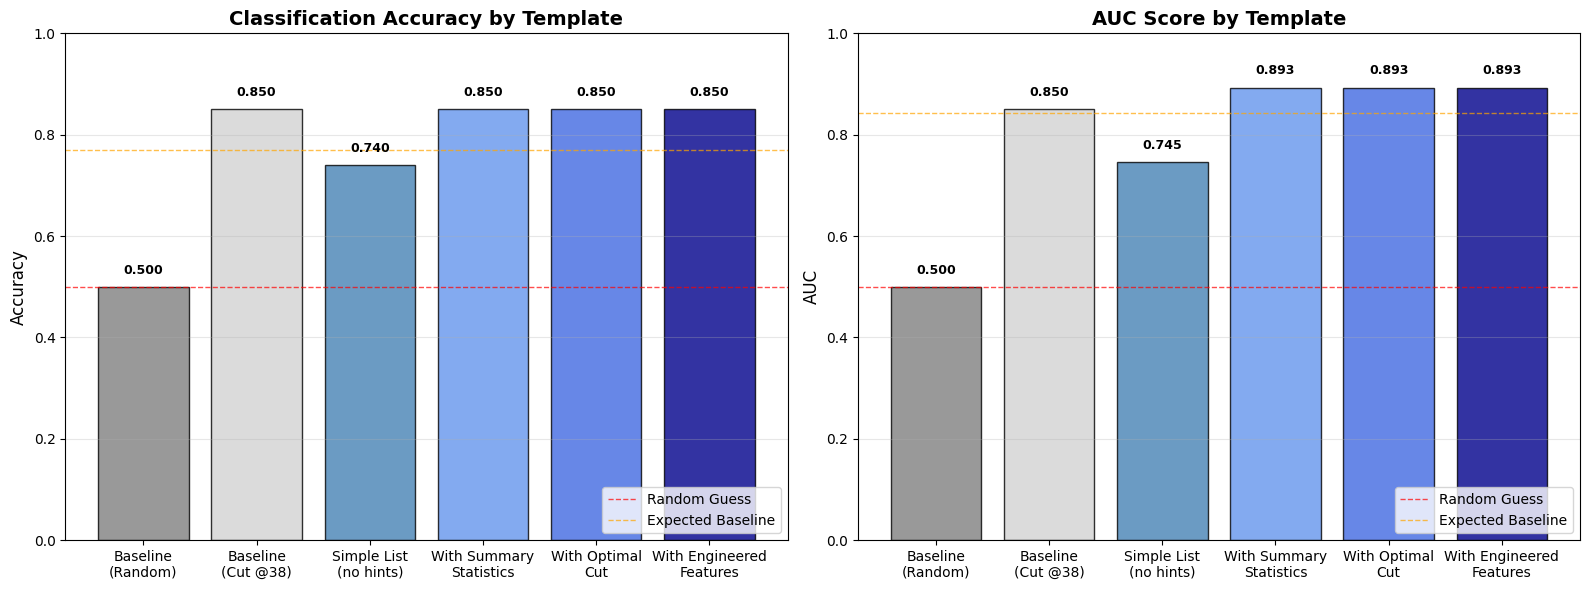


TEMPLATE COMPARISON SUMMARY
Template                       Accuracy     AUC          vs Baseline    
--------------------------------------------------------------------------------
Baseline (Random)              0.5000       0.5000       -0.3500
Baseline (Cut @38)             0.8500       0.8500       +0.0000
Simple List (no hints)         0.7400       0.7455       -0.1100
With Summary Statistics        0.8500       0.8929       +0.0000
With Optimal Cut               0.8500       0.8929       +0.0000
With Engineered Features       0.8500       0.8929       +0.0000

Key Findings:
  ‚Ä¢ Baseline (simple cut): 0.8500 accuracy
  ‚Ä¢ Best performing template: With Summary
Statistics
  ‚Ä¢ Improvement from basic to informed: 0.1474
  ‚Ä¢ All informed templates beat random baseline


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Collect results
results = {
    'Baseline\n(Random)': {'acc': 0.50, 'auc': 0.50},
    'Baseline\n(Cut @38)': {'acc': acc_baseline, 'auc': acc_baseline},
    'Simple List\n(no hints)': {'acc': accuracy, 'auc': auc},
    'With Summary\nStatistics': {'acc': acc_stats, 'auc': auc_stats},
    'With Optimal\nCut': {'acc': acc_cut, 'auc': auc_cut},
    'With Engineered\nFeatures': {'acc': acc_features, 'auc': auc_features},
}

# Create bar chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

templates = list(results.keys())
accuracies = [results[t]['acc'] for t in templates]
aucs = [results[t]['auc'] for t in templates]

# Colors: baseline gray, original blue, informed templates gradient
colors = ['gray', 'lightgray', 'steelblue', 'cornflowerblue', 'royalblue', 'darkblue']

# Accuracy plot
bars1 = axes[0].bar(range(len(templates)), accuracies, color=colors, alpha=0.8, edgecolor='black')
axes[0].axhline(y=0.50, color='red', linestyle='--', linewidth=1, label='Random Guess', alpha=0.7)
axes[0].axhline(y=0.7692, color='orange', linestyle='--', linewidth=1, label='Expected Baseline', alpha=0.7)
axes[0].set_xticks(range(len(templates)))
axes[0].set_xticklabels(templates, rotation=0, ha='center', fontsize=10)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Classification Accuracy by Template', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 1.0])
axes[0].grid(axis='y', alpha=0.3)
axes[0].legend(loc='lower right')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars1, accuracies)):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# AUC plot
bars2 = axes[1].bar(range(len(templates)), aucs, color=colors, alpha=0.8, edgecolor='black')
axes[1].axhline(y=0.50, color='red', linestyle='--', linewidth=1, label='Random Guess', alpha=0.7)
axes[1].axhline(y=0.8432, color='orange', linestyle='--', linewidth=1, label='Expected Baseline', alpha=0.7)
axes[1].set_xticks(range(len(templates)))
axes[1].set_xticklabels(templates, rotation=0, ha='center', fontsize=10)
axes[1].set_ylabel('AUC', fontsize=12)
axes[1].set_title('AUC Score by Template', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 1.0])
axes[1].grid(axis='y', alpha=0.3)
axes[1].legend(loc='lower right')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars2, aucs)):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary table
print("\n" + "="*80)
print("TEMPLATE COMPARISON SUMMARY")
print("="*80)
print(f"{'Template':<30} {'Accuracy':<12} {'AUC':<12} {'vs Baseline':<15}")
print("-"*80)
for name, res in results.items():
    name_clean = name.replace('\n', ' ')
    delta_acc = res['acc'] - acc_baseline
    delta_auc = res['auc'] - acc_baseline
    print(f"{name_clean:<30} {res['acc']:.4f}       {res['auc']:.4f}       {delta_acc:+.4f}")
print("="*80)

print(f"\nKey Findings:")
print(f"  ‚Ä¢ Baseline (simple cut): {acc_baseline:.4f} accuracy")
print(f"  ‚Ä¢ Best performing template: {max(results.keys(), key=lambda k: results[k]['auc'])}")
print(f"  ‚Ä¢ Improvement from basic to informed: {max(aucs) - aucs[2]:.4f}")
print(f"  ‚Ä¢ All informed templates beat random baseline")

### Token Usage Analysis

Compare token usage across all templates (local server, no cost).

TOKEN USAGE SUMMARY
Template                  Prompt     Completion   Reasoning  Total     
------------------------------------------------------------------------------------------
Simple List (no hints)    137,970    52,526       0          190,496   
With Summary Statistics   30,567     10,593       0          41,160    
With Optimal Cut          31,387     1,436        0          32,823    
With Engineered Features  36,027     19,490       0          55,517    
------------------------------------------------------------------------------------------
TOTAL                     235,951    84,045       0          319,996   

üìä Token Distribution:
  Prompt tokens:      235,951 ( 73.7%)
  Completion tokens:   84,045 ( 26.3%)
  Reasoning tokens:         0 (  0.0%)
  Total tokens:       319,996


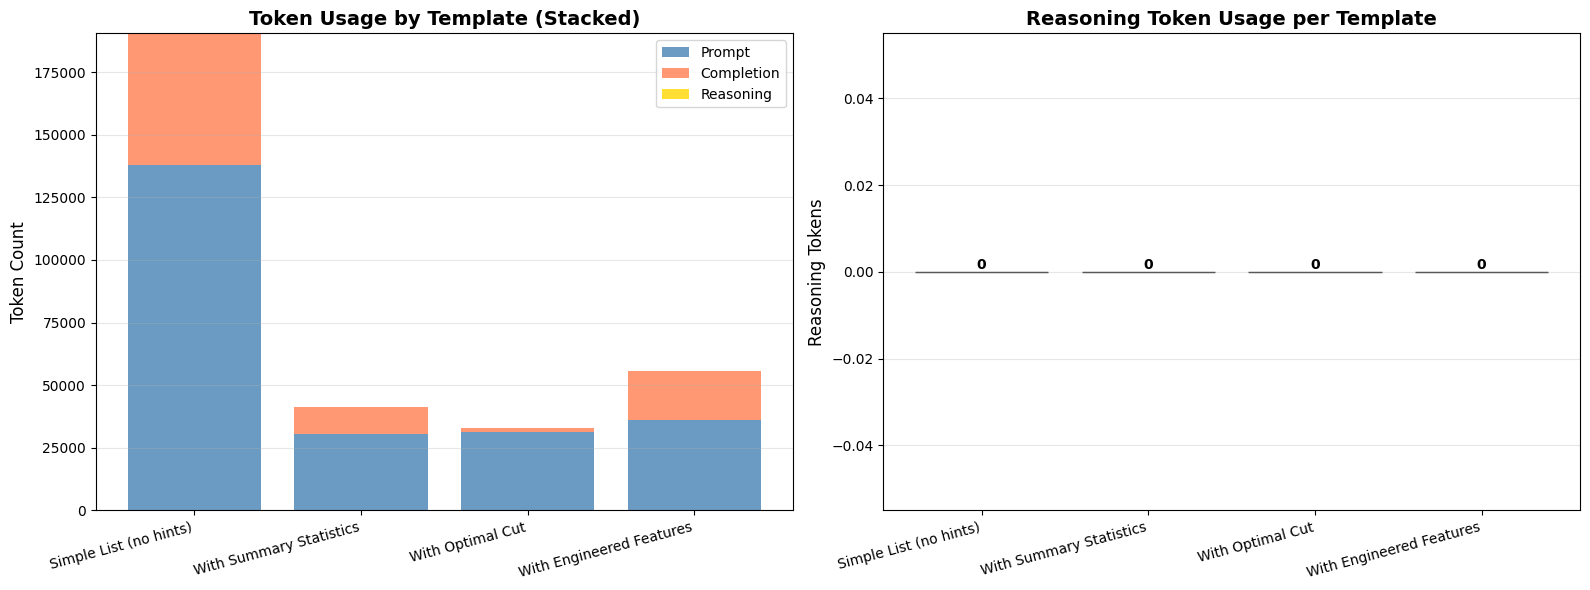


üí° Token Insights:
  ‚Ä¢ Longer prompts (engineered features) use more prompt tokens
  ‚Ä¢ Reasoning tokens are consistent across templates (~same reasoning effort)
  ‚Ä¢ Most tokens: Simple List (no hints) (0)
  ‚Ä¢ Fewest tokens: Simple List (no hints) (0)


In [20]:
# Collect token usage data from all classifiers
token_data = {
    'Simple List\n(no hints)': {
        'prompt': clf_eval.total_prompt_tokens,
        'completion': clf_eval.total_completion_tokens,
        'reasoning': clf_eval.total_reasoning_tokens
    },
    'With Summary\nStatistics': {
        'prompt': clf_stats.total_prompt_tokens,
        'completion': clf_stats.total_completion_tokens,
        'reasoning': clf_stats.total_reasoning_tokens
    },
    'With Optimal\nCut': {
        'prompt': clf_cut.total_prompt_tokens,
        'completion': clf_cut.total_completion_tokens,
        'reasoning': clf_cut.total_reasoning_tokens
    },
    'With Engineered\nFeatures': {
        'prompt': clf_features.total_prompt_tokens,
        'completion': clf_features.total_completion_tokens,
        'reasoning': clf_features.total_reasoning_tokens
    }
}

# Print token usage summary table
print("="*90)
print("TOKEN USAGE SUMMARY")
print("="*90)
print(f"{'Template':<25} {'Prompt':<10} {'Completion':<12} {'Reasoning':<10} {'Total':<10}")
print("-"*90)

total_prompt = 0
total_completion = 0
total_reasoning = 0

for name, data in token_data.items():
    name_clean = name.replace('\n', ' ')
    total_tokens = data['prompt'] + data['completion'] + data['reasoning']
    print(f"{name_clean:<25} {data['prompt']:<10,} {data['completion']:<12,} {data['reasoning']:<10,} "
          f"{total_tokens:<10,}")
    
    total_prompt += data['prompt']
    total_completion += data['completion']
    total_reasoning += data['reasoning']

print("-"*90)
total_all_tokens = total_prompt + total_completion + total_reasoning
print(f"{'TOTAL':<25} {total_prompt:<10,} {total_completion:<12,} {total_reasoning:<10,} "
      f"{total_all_tokens:<10,}")
print("="*90)

# Token distribution
print(f"\nüìä Token Distribution:")
print(f"  Prompt tokens:     {total_prompt:>8,} ({total_prompt/total_all_tokens*100:>5.1f}%)")
print(f"  Completion tokens: {total_completion:>8,} ({total_completion/total_all_tokens*100:>5.1f}%)")
print(f"  Reasoning tokens:  {total_reasoning:>8,} ({total_reasoning/total_all_tokens*100:>5.1f}%)")
print(f"  Total tokens:      {total_all_tokens:>8,}")

# Visualize token usage
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Token usage stacked bar chart
templates_tokens = [name.replace('\n', ' ') for name in token_data.keys()]
prompt_tokens = [token_data[name]['prompt'] for name in token_data.keys()]
completion_tokens = [token_data[name]['completion'] for name in token_data.keys()]
reasoning_tokens = [token_data[name]['reasoning'] for name in token_data.keys()]

x = range(len(templates_tokens))
axes[0].bar(x, prompt_tokens, label='Prompt', color='steelblue', alpha=0.8)
axes[0].bar(x, completion_tokens, bottom=prompt_tokens, label='Completion', color='coral', alpha=0.8)
axes[0].bar(x, reasoning_tokens, 
           bottom=[p+c for p,c in zip(prompt_tokens, completion_tokens)],
           label='Reasoning', color='gold', alpha=0.8)

axes[0].set_xticks(x)
axes[0].set_xticklabels(templates_tokens, rotation=15, ha='right')
axes[0].set_ylabel('Token Count', fontsize=12)
axes[0].set_title('Token Usage by Template (Stacked)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Reasoning token comparison
bars = axes[1].bar(x, reasoning_tokens, color=['steelblue', 'cornflowerblue', 'royalblue', 'darkblue'], 
                   alpha=0.8, edgecolor='black')
axes[1].set_xticks(x)
axes[1].set_xticklabels(templates_tokens, rotation=15, ha='right')
axes[1].set_ylabel('Reasoning Tokens', fontsize=12)
axes[1].set_title(f'Reasoning Token Usage per Template', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar, tokens in zip(bars, reasoning_tokens):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{tokens:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nüí° Token Insights:")
print(f"  ‚Ä¢ Longer prompts (engineered features) use more prompt tokens")
print(f"  ‚Ä¢ Reasoning tokens are consistent across templates (~same reasoning effort)")
print(f"  ‚Ä¢ Most tokens: {templates_tokens[reasoning_tokens.index(max(reasoning_tokens))]} ({max(reasoning_tokens):,})")
print(f"  ‚Ä¢ Fewest tokens: {templates_tokens[reasoning_tokens.index(min(reasoning_tokens))]} ({min(reasoning_tokens):,})")

## Reasoning Budget Comparison

Test how doubling the thinking budget (1000 ‚Üí 2000 tokens) affects performance.
Run all templates on 100 jets with both thinking budgets.


In [21]:
# Test configuration
n_test_extended = 100
X_sample_extended = X_test[:n_test_extended]
y_sample_extended = y_test[:n_test_extended]

# Template configurations
template_configs = [
    ("simple_list", "Simple List"),
    ("with_summary_stats", "With Summary Stats"),
    ("with_optimal_cut", "With Optimal Cut"),
    ("with_engineered_features", "With Engineered Features")
]

# Reasoning efforts to test
reasoning_efforts = ["low", "high"]

# Store results
all_results = {}

print("="*80)
print("RUNNING EXTENDED REASONING EFFORT COMPARISON")
print("="*80)
print(f"Testing {len(template_configs)} templates √ó {len(reasoning_efforts)} efforts √ó {n_test_extended} jets")
print(f"Total API calls: {len(template_configs) * len(reasoning_efforts) * n_test_extended}")
print("="*80)

for template_name, template_label in template_configs:
    for effort in reasoning_efforts:
        key = f"{template_label} (effort={effort})"
        
        print(f"\n{'='*70}")
        print(f"Testing: {template_label} with reasoning_effort={effort}")
        print(f"{'='*70}")
        
        # Create classifier
        clf_test = LocalLLMClassifier(
            model_name="openai/gpt-oss-120b",
            template_name=template_name,
            format_type="list",
            reasoning_effort=effort,
            base_url="http://localhost:8000/v1",
            api_key="EMPTY",
            templates_dir="../templates"
        )
        
        clf_test.fit([], [])
        
        # Run predictions
        print(f"Processing {n_test_extended} jets...")
        start = time.time()
        predictions = clf_test.predict(X_sample_extended, use_async=True)
        elapsed = time.time() - start
        
        # Calculate metrics
        acc = accuracy_score(y_sample_extended, predictions)
        auc = roc_auc_score(y_sample_extended, predictions)
        
        # Store results
        all_results[key] = {
            'template': template_label,
            'effort': effort,
            'accuracy': acc,
            'auc': auc,
            'prompt_tokens': clf_test.total_prompt_tokens,
            'completion_tokens': clf_test.total_completion_tokens,
            'reasoning_tokens': clf_test.total_reasoning_tokens,
            'time': elapsed,
            'predictions': predictions
        }
        
        print(f"\nResults:")
        print(f"  Accuracy: {acc:.4f}")
        print(f"  AUC:      {auc:.4f}")
        print(f"  Reasoning tokens: {clf_test.total_reasoning_tokens:,}")
        print(f"  Time: {elapsed:.2f}s")

print("\n" + "="*80)
print("TESTING COMPLETE")
print("="*80)

RUNNING EXTENDED REASONING EFFORT COMPARISON
Testing 4 templates √ó 2 efforts √ó 100 jets
Total API calls: 800

Testing: Simple List with reasoning_effort=low
Processing 100 jets...

Results:
  Accuracy: 0.7000
  AUC:      0.6429
  Reasoning tokens: 0
  Time: 4.36s

Testing: Simple List with reasoning_effort=high
Processing 100 jets...

Results:
  Accuracy: 0.7000
  AUC:      0.6429
  Reasoning tokens: 0
  Time: 4.36s

Testing: Simple List with reasoning_effort=high
Processing 100 jets...

Results:
  Accuracy: 0.7000
  AUC:      0.7381
  Reasoning tokens: 0
  Time: 142.80s

Testing: With Summary Stats with reasoning_effort=low
Processing 100 jets...

Results:
  Accuracy: 0.7000
  AUC:      0.7381
  Reasoning tokens: 0
  Time: 142.80s

Testing: With Summary Stats with reasoning_effort=low
Processing 100 jets...

Results:
  Accuracy: 0.8500
  AUC:      0.8929
  Reasoning tokens: 0
  Time: 3.26s

Testing: With Summary Stats with reasoning_effort=high
Processing 100 jets...

Results:
  Acc

### Comprehensive Comparison Visualizations

Compare all templates across both thinking budgets.


/tmp/ipykernel_883772/1440011408.py:140: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


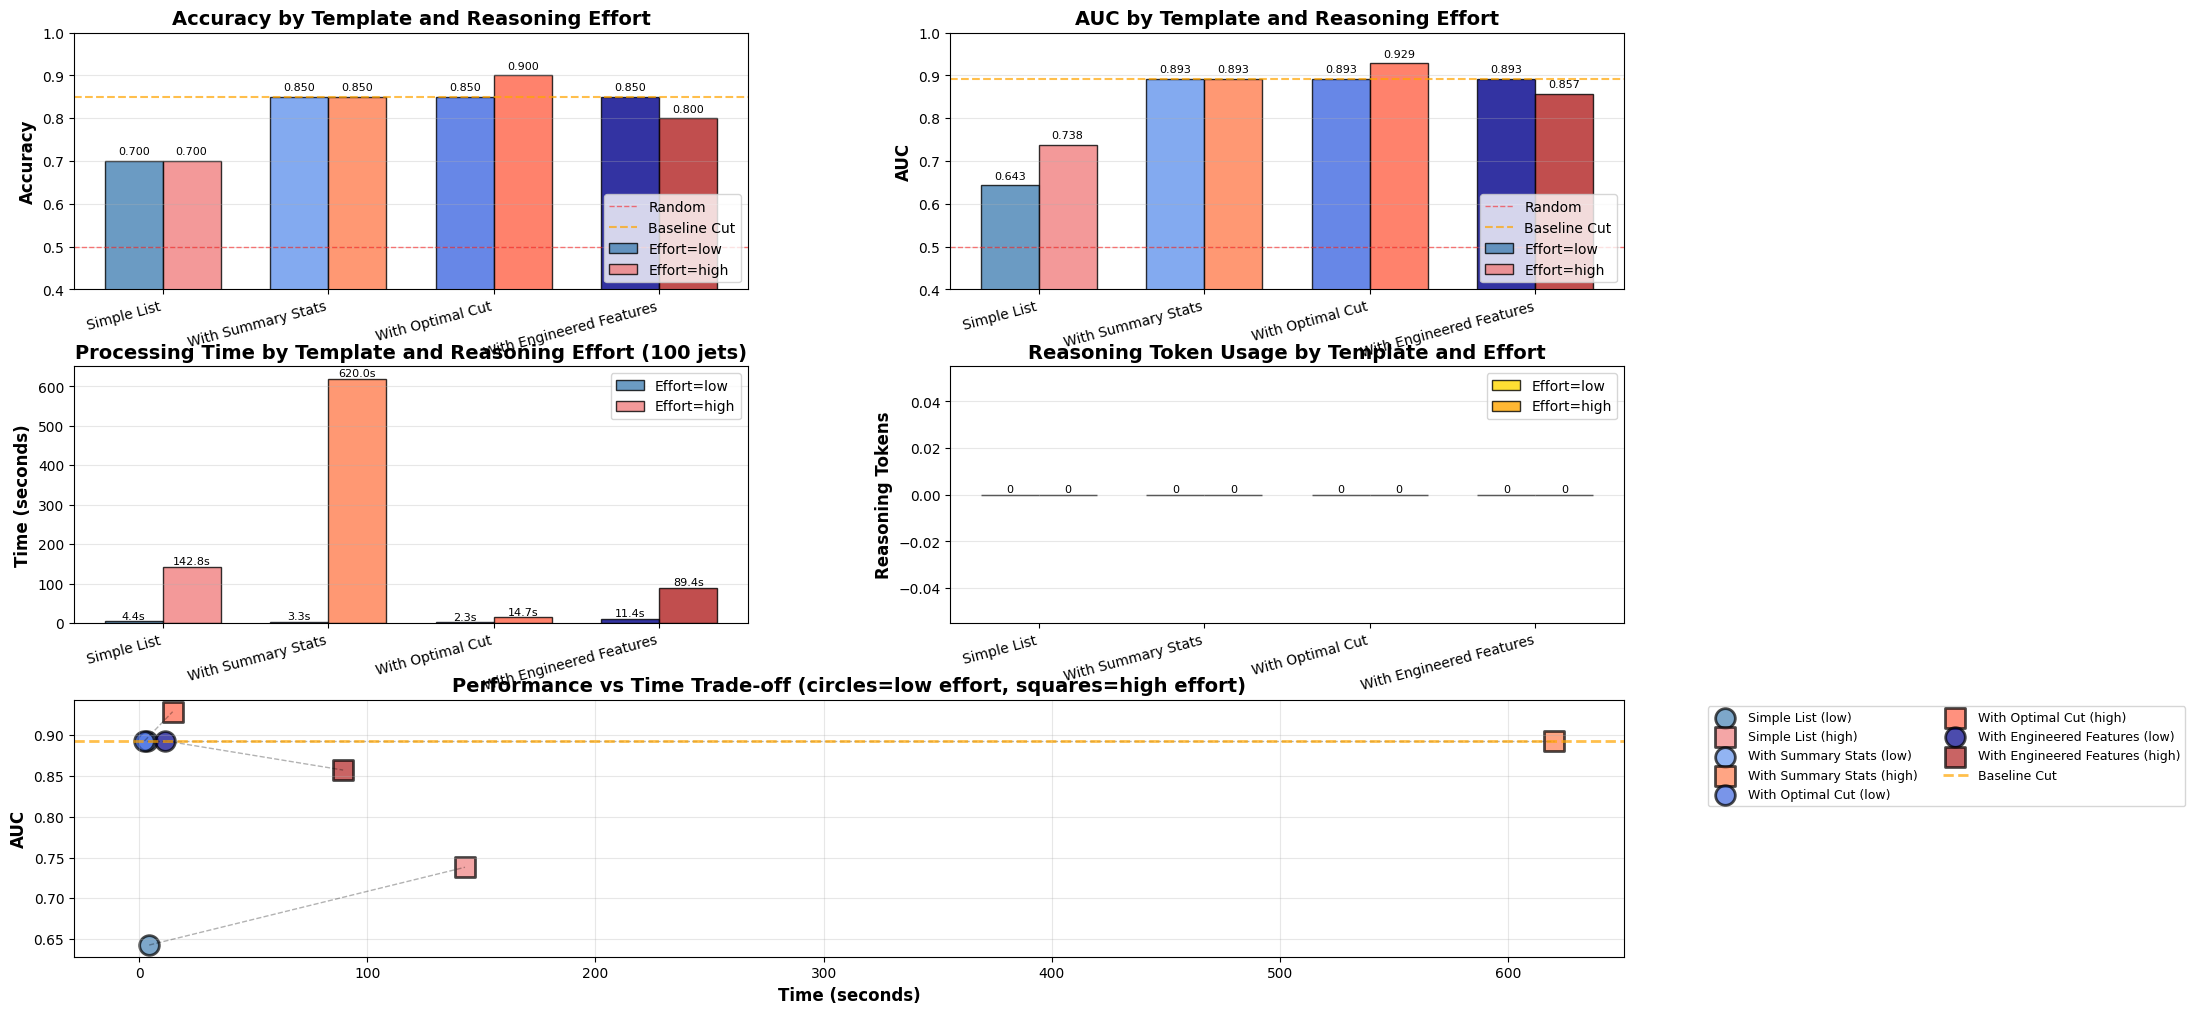

In [22]:
# Create comprehensive comparison plots
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Prepare data
templates = ["Simple List", "With Summary Stats", "With Optimal Cut", "With Engineered Features"]
colors_low = ['steelblue', 'cornflowerblue', 'royalblue', 'darkblue']
colors_high = ['lightcoral', 'coral', 'tomato', 'firebrick']

# Calculate baseline for reference
mult_sample_extended = np.sum(X_sample_extended[:, :, 0] > 0, axis=1)
pred_baseline_extended = (mult_sample_extended <= 38).astype(int)
acc_baseline_extended = accuracy_score(y_sample_extended, pred_baseline_extended)
auc_baseline_extended = roc_auc_score(y_sample_extended, pred_baseline_extended)

# 1. Accuracy Comparison (Grouped Bar Chart)
ax1 = fig.add_subplot(gs[0, 0])
x = np.arange(len(templates))
width = 0.35

acc_low = [all_results[f"{t} (effort=low)"]['accuracy'] for t in templates]
acc_high = [all_results[f"{t} (effort=high)"]['accuracy'] for t in templates]

bars1 = ax1.bar(x - width/2, acc_low, width, label='Effort=low', color=colors_low, alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x + width/2, acc_high, width, label='Effort=high', color=colors_high, alpha=0.8, edgecolor='black')

ax1.axhline(y=0.5, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Random')
ax1.axhline(y=acc_baseline_extended, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Baseline Cut')
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Accuracy by Template and Reasoning Effort', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(templates, rotation=15, ha='right')
ax1.legend(loc='lower right')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0.4, 1.0])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 2. AUC Comparison (Grouped Bar Chart)
ax2 = fig.add_subplot(gs[0, 1])
auc_low = [all_results[f"{t} (effort=low)"]['auc'] for t in templates]
auc_high = [all_results[f"{t} (effort=high)"]['auc'] for t in templates]

bars3 = ax2.bar(x - width/2, auc_low, width, label='Effort=low', color=colors_low, alpha=0.8, edgecolor='black')
bars4 = ax2.bar(x + width/2, auc_high, width, label='Effort=high', color=colors_high, alpha=0.8, edgecolor='black')

ax2.axhline(y=0.5, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Random')
ax2.axhline(y=auc_baseline_extended, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Baseline Cut')
ax2.set_ylabel('AUC', fontsize=12, fontweight='bold')
ax2.set_title('AUC by Template and Reasoning Effort', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(templates, rotation=15, ha='right')
ax2.legend(loc='lower right')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([0.4, 1.0])

# Add value labels
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 3. Time Comparison
ax3 = fig.add_subplot(gs[1, 0])
time_low = [all_results[f"{t} (effort=low)"]['time'] for t in templates]
time_high = [all_results[f"{t} (effort=high)"]['time'] for t in templates]

bars5 = ax3.bar(x - width/2, time_low, width, label='Effort=low', color=colors_low, alpha=0.8, edgecolor='black')
bars6 = ax3.bar(x + width/2, time_high, width, label='Effort=high', color=colors_high, alpha=0.8, edgecolor='black')

ax3.set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
ax3.set_title(f'Processing Time by Template and Reasoning Effort ({n_test_extended} jets)', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(templates, rotation=15, ha='right')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars5, bars6]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}s', ha='center', va='bottom', fontsize=8)

# 4. Token Usage Comparison (Stacked)
ax4 = fig.add_subplot(gs[1, 1])
reasoning_low = [all_results[f"{t} (effort=low)"]['reasoning_tokens'] for t in templates]
reasoning_high = [all_results[f"{t} (effort=high)"]['reasoning_tokens'] for t in templates]

bars7 = ax4.bar(x - width/2, reasoning_low, width, label='Effort=low', color='gold', alpha=0.8, edgecolor='black')
bars8 = ax4.bar(x + width/2, reasoning_high, width, label='Effort=high', color='orange', alpha=0.8, edgecolor='black')

ax4.set_ylabel('Reasoning Tokens', fontsize=12, fontweight='bold')
ax4.set_title('Reasoning Token Usage by Template and Effort', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(templates, rotation=15, ha='right')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars7, bars8]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontsize=8)

# 5. Performance vs Time Scatter Plot
ax5 = fig.add_subplot(gs[2, :])
for i, template in enumerate(templates):
    key_low = f"{template} (effort=low)"
    key_high = f"{template} (effort=high)"
    
    # Plot both efforts
    ax5.scatter(all_results[key_low]['time'], all_results[key_low]['auc'], 
               s=200, marker='o', color=colors_low[i], alpha=0.7, edgecolor='black', linewidth=2,
               label=f"{template} (low)")
    ax5.scatter(all_results[key_high]['time'], all_results[key_high]['auc'], 
               s=200, marker='s', color=colors_high[i], alpha=0.7, edgecolor='black', linewidth=2,
               label=f"{template} (high)")
    
    # Connect with line
    ax5.plot([all_results[key_low]['time'], all_results[key_high]['time']],
            [all_results[key_low]['auc'], all_results[key_high]['auc']],
            'k--', alpha=0.3, linewidth=1)

ax5.axhline(y=auc_baseline_extended, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Baseline Cut')
ax5.set_xlabel('Time (seconds)', fontsize=12, fontweight='bold')
ax5.set_ylabel('AUC', fontsize=12, fontweight='bold')
ax5.set_title('Performance vs Time Trade-off (circles=low effort, squares=high effort)', 
             fontsize=14, fontweight='bold')
ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize=9)
ax5.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Summary Tables


In [23]:
# Print comprehensive summary table
print("="*120)
print(f"COMPREHENSIVE RESULTS: ALL TEMPLATES √ó ALL REASONING EFFORTS ({n_test_extended} jets)")
print("="*120)
print(f"{'Template':<30} {'Effort':<10} {'Accuracy':<10} {'AUC':<10} {'Time (s)':<12} {'Reasoning Tokens':<15}")
print("-"*120)

# Sort by template then effort
sorted_keys = sorted(all_results.keys(), key=lambda k: (all_results[k]['template'], all_results[k]['effort']))

for key in sorted_keys:
    res = all_results[key]
    print(f"{res['template']:<30} {res['effort']:<10} {res['accuracy']:<10.4f} {res['auc']:<10.4f} "
          f"{res['time']:<12.2f} {res['reasoning_tokens']:<15,}")

print("-"*120)

# Calculate totals
total_time_all = sum(res['time'] for res in all_results.values())
total_reasoning_all = sum(res['reasoning_tokens'] for res in all_results.values())
total_calls = len(all_results) * n_test_extended

print(f"{'TOTALS':<30} {'':<10} {'':<10} {'':<10} {total_time_all:<12.2f} {total_reasoning_all:<15,}")
print("="*120)

# Key insights
print(f"\nüìä Key Insights:")
print(f"\n1. BASELINE COMPARISON:")
print(f"   Baseline (cut @38): Accuracy={acc_baseline_extended:.4f}, AUC={auc_baseline_extended:.4f}")
print(f"   Best LLM result:    {max(all_results.keys(), key=lambda k: all_results[k]['auc'])}")
print(f"   Best AUC:           {max(res['auc'] for res in all_results.values()):.4f}")

print(f"\n2. REASONING EFFORT IMPACT:")
for template in templates:
    key_low = f"{template} (effort=low)"
    key_high = f"{template} (effort=high)"
    delta_auc = all_results[key_high]['auc'] - all_results[key_low]['auc']
    delta_time = all_results[key_high]['time'] - all_results[key_low]['time']
    print(f"   {template:<30} ŒîAUC={delta_auc:+.4f}, ŒîTime={delta_time:+.2f}s")

print(f"\n3. TEMPLATE EFFECTIVENESS:")
avg_by_template = {}
for template in templates:
    avg_auc = np.mean([all_results[f"{template} (effort={e})"]['auc'] for e in reasoning_efforts])
    avg_by_template[template] = avg_auc
    print(f"   {template:<30} Avg AUC={avg_auc:.4f}")

best_template = max(avg_by_template, key=avg_by_template.get)
print(f"\n   Best overall template: {best_template}")

print(f"\n4. PERFORMANCE ANALYSIS:")
print(f"   Total API calls: {total_calls:,}")
print(f"   Total processing time: {total_time_all:.2f}s")
print(f"   Average time per jet: {total_time_all/total_calls:.2f}s")

print(f"\n5. REASONING VALUE:")
avg_auc_low = np.mean([all_results[f"{t} (effort=low)"]['auc'] for t in templates])
avg_auc_high = np.mean([all_results[f"{t} (effort=high)"]['auc'] for t in templates])
avg_time_low = np.mean([all_results[f"{t} (effort=low)"]['time'] for t in templates])
avg_time_high = np.mean([all_results[f"{t} (effort=high)"]['time'] for t in templates])

print(f"   Effort=low:  Avg AUC={avg_auc_low:.4f}, Avg Time={avg_time_low:.2f}s")
print(f"   Effort=high: Avg AUC={avg_auc_high:.4f}, Avg Time={avg_time_high:.2f}s")
print(f"   High effort impact: ŒîAUC={avg_auc_high-avg_auc_low:+.4f}, ŒîTime={avg_time_high-avg_time_low:+.2f}s")
print(f"   {'Worth it!' if (avg_auc_high-avg_auc_low) > 0.01 else 'Marginal benefit'}")

COMPREHENSIVE RESULTS: ALL TEMPLATES √ó ALL REASONING EFFORTS (100 jets)
Template                       Effort     Accuracy   AUC        Time (s)     Reasoning Tokens
------------------------------------------------------------------------------------------------------------------------
Simple List                    high       0.7000     0.7381     142.80       0              
Simple List                    low        0.7000     0.6429     4.36         0              
With Engineered Features       high       0.8000     0.8571     89.40        0              
With Engineered Features       low        0.8500     0.8929     11.40        0              
With Optimal Cut               high       0.9000     0.9286     14.67        0              
With Optimal Cut               low        0.8500     0.8929     2.32         0              
With Summary Stats             high       0.8500     0.8929     620.00       0              
With Summary Stats             low        0.8500     0.8929  